In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline
#tambahkan library sesuai kebutuhan

In [2]:
data = pd.read_csv('activity_km_07_01.csv')
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [3]:
data = data.rename(columns={'PH': 'pH', 'cahaya': 'cahaya', 'intensitas air': 'intensitas_air', 'suhu':'suhu','PPM':'PPM','tinggi air':'tinggi_air','aksi':'aksi'})

## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [4]:
def getNumber(str):
    if str=="Ada":
        return 1
    elif str=="Tidak ada":
        return 0
    else:
        return str
data["cahaya"]=data["cahaya"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


In [5]:
def getNumber(str):
    if str=="Tinggi":
        return 3
    elif str=="Cukup":
        return 2
    elif str=="Rendah":
        return 1
    elif str=="Rendah sekali":
        return 0
    else:
        return str
data["intensitas_air"]=data["intensitas_air"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,1.0,3,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,1.0,3,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,1.0,3,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,3,27.1,602.0,444,Tidak melakukan apa-apa


In [6]:
# example of a function for calculating softmax for a list of numbers
from numpy import exp
# calculate the softmax of a vector
def softmax(vector):
    e = exp(vector)
    return e / e.sum()
 
# define data
yold = [0, 1, 2, 3]
# convert list of numbers to a list of probabilities
resulty = softmax(yold)
# report the probabilities
print(resulty)
# report the sum of the probabilities
print(sum(resulty))

[0.0320586  0.08714432 0.23688282 0.64391426]
1.0


In [7]:
def getNumber(str):
    if str=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 3
    elif str=="Hidupkan Lampu":
        return 2
    elif str=="Hidupkan Pompa nutrisi TDS":
        return 1
    elif str=="Tidak melakukan apa-apa":
        return 0
    else:
        return str
        
data["aksi"]=data["aksi"].apply(getNumber)

data.head()

,pH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,3
1,5.7,1.0,3,26.9,79.0,557,3
2,6.0,1.0,3,27.0,11.0,491,3
3,6.5,1.0,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0


## 3. Handle Missing Value

In [8]:
#Cek missing value
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/891)*100})
missing_data

,total_missing,perc_missing
pH,16,1.795735
cahaya,26,2.918070
intensitas_air,0,0.000000
suhu,27,3.030303
PPM,5,0.561167
tinggi_air,0,0.000000
aksi,0,0.000000


In [9]:
#mengelompokkan missing value
column_missing = ['pH', 'cahaya', 'suhu', 'PPM']
column_missing

['pH', 'cahaya', 'suhu', 'PPM']

In [10]:
#solve missing value
for col in column_missing:
  data[col].replace(np.nan, data[col].mean(), inplace=True)

data.isnull().sum()

pH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [11]:
data.columns

Index(['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

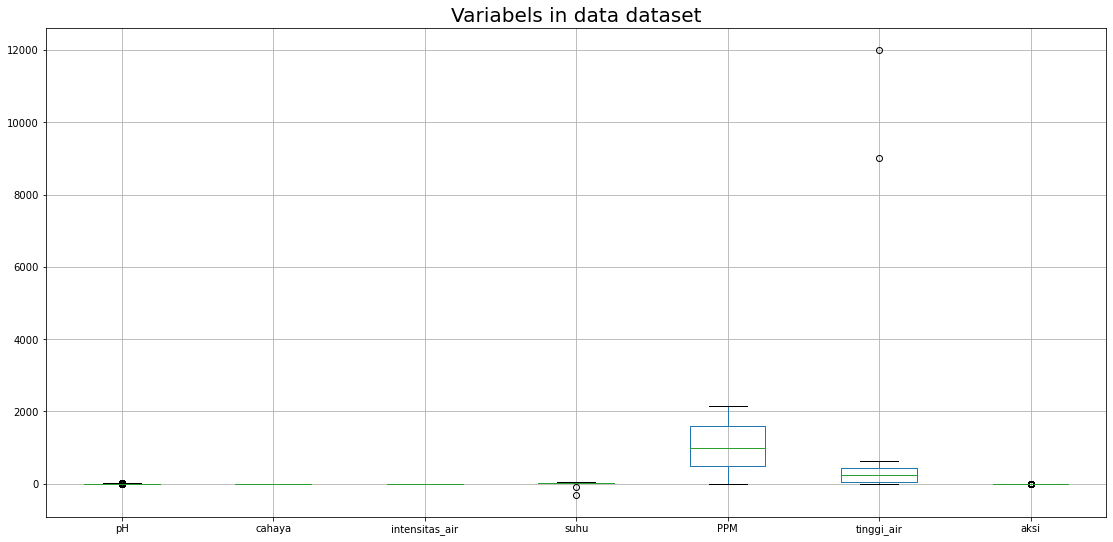

In [12]:
num_cols = ['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Variabels in data dataset", fontsize=20)
plt.show()

In [13]:
#terlihat bahwa kolom yang mempunyai outliers adalah tinggi_air dan suhu

In [14]:
#replace outliers suhu
Q1 = data['suhu'].quantile(0.25)
Q3 = data['suhu'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['suhu']=np.where(data['suhu']>upper_whisker,upper_whisker,np.where(data['suhu']<lower_whisker,lower_whisker,data['suhu']))

In [15]:
#replace outliers tinggi_air
Q1 = data['tinggi_air'].quantile(0.25)
Q3 = data['tinggi_air'].quantile(0.75)
IQR = Q3 - Q1

whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['tinggi_air']=np.where(data['tinggi_air']>upper_whisker,upper_whisker,np.where(data['tinggi_air']<lower_whisker,lower_whisker,data['tinggi_air']))

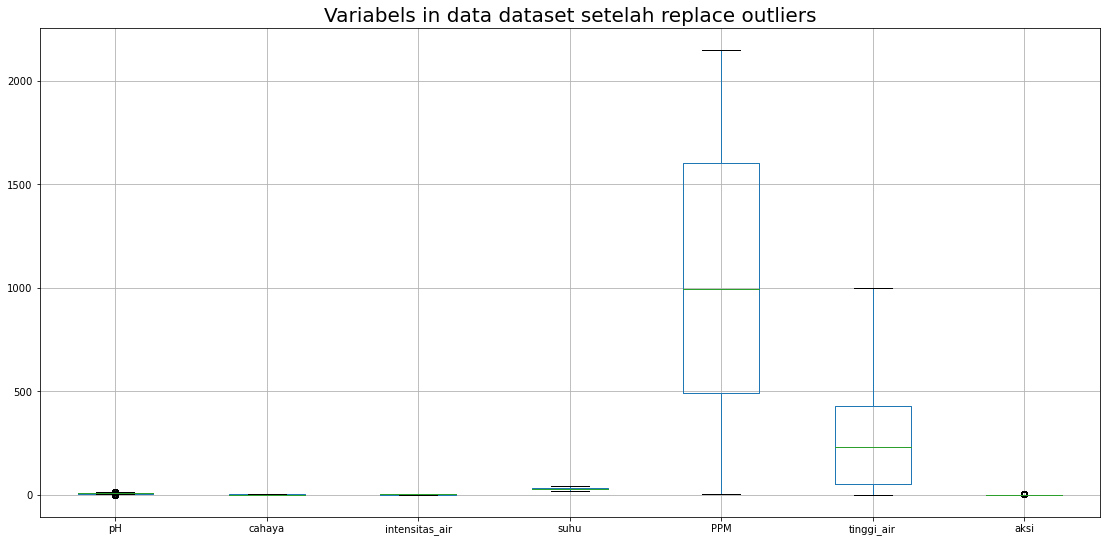

In [16]:
#setelah direplace outliers nya
num_cols = ['pH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi']
plt.figure(figsize=(19,9))
data[num_cols].boxplot()
plt.title("Variabels in data dataset setelah replace outliers", fontsize=20)
plt.show()

## 5. Pisahkan data feature dengan label

In [17]:
X = data.iloc[:,:6].values
X

array([[6.500e+00, 1.000e+00, 3.000e+00, 2.700e+01, 1.880e+02, 6.220e+02],
       [5.700e+00, 1.000e+00, 3.000e+00, 2.690e+01, 7.900e+01, 5.570e+02],
       [6.000e+00, 1.000e+00, 3.000e+00, 2.700e+01, 1.100e+01, 4.910e+02],
       ...,
       [3.200e+00, 1.000e+00, 0.000e+00, 2.530e+01, 7.930e+02, 1.900e+01],
       [1.400e+00, 1.000e+00, 0.000e+00, 2.540e+01, 1.052e+03, 3.000e+00],
       [5.000e+00, 1.000e+00, 0.000e+00, 2.530e+01, 9.770e+02, 1.900e+01]])

In [18]:
Y = data.iloc[:, 6].values
Y

array([3, 3, 3, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 3, 0, 3, 3, 3,

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [19]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from collections import Counter
counter = Counter(Y)
print(counter)

Counter({0: 473, 2: 92, 3: 39, 1: 12})


Class=3, n=39 (6.331%)
Class=0, n=473 (76.786%)
Class=2, n=92 (14.935%)
Class=1, n=12 (1.948%)


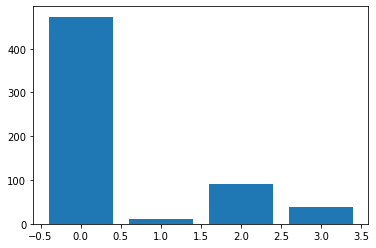

In [21]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# split into input and output elements
X, Y = data.iloc[:,:6].values, data.iloc[:, 6].values
# label encode the target variable
Y = LabelEncoder().fit_transform(Y)
# summarize distribution
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [22]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [23]:
counter = Counter(Y_smote)
print(counter)

Counter({3: 473, 0: 473, 2: 473, 1: 473})


## 7. Visualisasikan Data sehingga kita bisa mengetahui sebuah informasi

In [24]:
import seaborn as sns

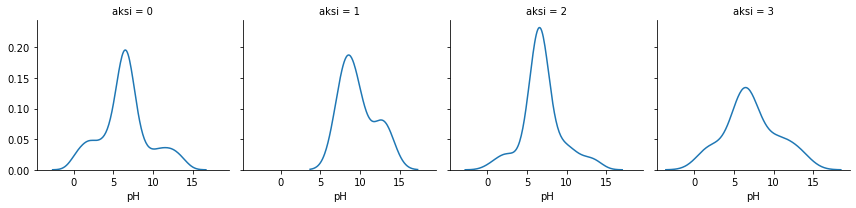

In [25]:
g = sns.FacetGrid(data, col='aksi')
g = g.map(sns.kdeplot, 'pH')


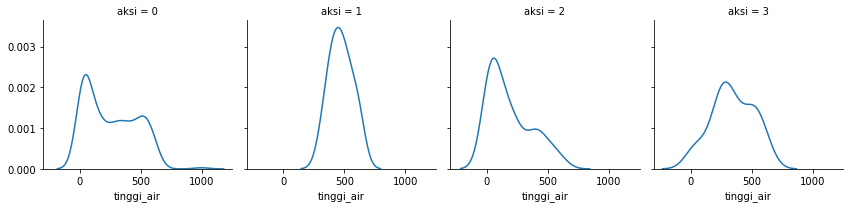

In [26]:
g = sns.FacetGrid(data, col='aksi')
g = g.map(sns.kdeplot, 'tinggi_air')


## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0.46428571 1.         1.         0.38738739 0.08705773 0.62277847]
 [0.40714286 1.         1.         0.38288288 0.03631285 0.55769712]
 [0.42857143 1.         1.         0.38738739 0.00465549 0.49161452]
 ...
 [0.22857143 1.         0.         0.31081081 0.36871508 0.01902378]
 [0.1        1.         0.         0.31531532 0.48929236 0.00300375]
 [0.35714286 1.         0.         0.31081081 0.45437616 0.01902378]]


## 10. Membuat Model ANN dengan Library Keras

In [28]:
from numpy import argmax
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [29]:
# split data 
X, y = data.values[:, :6], data.values[:, 6]
# ubah tipe data menjadi float32
X = X.astype('float32')

In [30]:
# encode string menjadi integer
y = LabelEncoder().fit_transform(y)
# split dataset menjadi 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# memperoleh banyaknya jumlah fitur pada input
n_features = X_train.shape[1]

(492, 6) (124, 6) (492,) (124,)


In [31]:
#define model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', ))
model.add(Dense(4, activation='softmax'))
# compile model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [43]:
# fit model 
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.3)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
11/11 [==============================] - 0s 8ms/step - loss: 0.3407 - accuracy: 0.8198 - val_loss: 0.6906 - val_accuracy: 0.7230
Epoch 2/150
11/11 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8256 - val_loss: 0.7380 - val_accuracy: 0.7635
Epoch 3/150
11/11 [==============================] - 0s 4ms/step - loss: 0.3351 - accuracy: 0.8256 - val_loss: 0.7454 - val_accuracy: 0.7770
Epoch 4/150
11/11 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.7936 - val_loss: 0.6964 - val_accuracy: 0.7297
Epoch 5/150
11/11 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.8198 - val_loss: 0.6735 - val_accuracy: 0.7432
Epoch 6/150
11/11 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8227 - val_loss: 0.6836 - val_accuracy: 0.7297
Epoch 7/150
11/11 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8110 - val_loss: 0.8769 - val_accuracy: 0.7365
Epoch 8/150
1

11/11 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8023 - val_loss: 0.6832 - val_accuracy: 0.7500
Epoch 59/150
11/11 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8372 - val_loss: 0.7150 - val_accuracy: 0.7703
Epoch 60/150
11/11 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8285 - val_loss: 0.9357 - val_accuracy: 0.7297
Epoch 61/150
11/11 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.8052 - val_loss: 0.8705 - val_accuracy: 0.7568
Epoch 62/150
11/11 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.7820 - val_loss: 0.8709 - val_accuracy: 0.7365
Epoch 63/150
11/11 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.8081 - val_loss: 0.7117 - val_accuracy: 0.7432
Epoch 64/150
11/11 [==============================] - 0s 4ms/step - loss: 0.3797 - accuracy: 0.8052 - val_loss: 0.7116 - val_accuracy: 0.7365
Epoch 65/150
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.8052 - val_loss: 1.0443 - val_accuracy: 0.7297
Epoch 116/150
11/11 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.8052 - val_loss: 1.1472 - val_accuracy: 0.7027
Epoch 117/150
11/11 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7965 - val_loss: 0.7071 - val_accuracy: 0.7365
Epoch 118/150
11/11 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8052 - val_loss: 0.7299 - val_accuracy: 0.7635
Epoch 119/150
11/11 [==============================] - 0s 3ms/step - loss: 0.3755 - accuracy: 0.8285 - val_loss: 0.6885 - val_accuracy: 0.7500
Epoch 120/150
11/11 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8227 - val_loss: 0.6962 - val_accuracy: 0.7500
Epoch 121/150
11/11 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8198 - val_loss: 0.7068 - val_accuracy: 0.7432
Epoch 122/150

In [49]:
# Buat prediksi
row = [6.0, 1.0, 3, 27.1, 345.0, 12000.0]
yhat = models.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[6.8216062e-12 8.2776016e-20 4.8653859e-01 5.1346147e-01]] (class=3)
